## Import and load data

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import graphviz

In [2]:
ATTRIBUTES = pd.Index([
    "AAGE",
    "ACLSWKR",
    "ADTIND",
    "ADTOCC",
    # "AGI",
    "AHGA",
    "AHRSPAY",
    "AHSCOL",
    "AMARITL",
    "AMJIND",
    "AMJOCC",
    "ARACE",
    "AREORGN",
    "ASEX",
    "AUNMEM",
    "AUNTYPE",
    "AWKSTAT",
    "CAPGAIN",
    "CAPLOSS",
    "DIVVAL",
    # "FEDTAX",
    "FILESTAT",
    "GRINREG",
    "GRINST",
    "HHDFMX",
    "HHDREL",
    "MARSUPWT", #This is sample weight, should be ignored
    "MIGMTR1",
    "MIGMTR3",
    "MIGMTR4",
    "MIGSAME",
    "MIGSUN",
    "NOEMP",
    "PARENT",
    # "PEARNVAL",
    "PEFNTVTY",
    "PEMNTVTY",
    "PENATVTY",
    "PRCITSHP",
    # "PTOTVAL",
    "SEOTR",
    # "TAXINC",
    "VETQVA",
    "VETYN",
    "WKSWORK",
    "YEAR",
    "RESULT"
])

In [7]:

DATA = pd.read_csv('census-income.data', header=None, names=ATTRIBUTES)
RESULTS = DATA[:]['RESULT']
RESULTS = RESULTS.apply(lambda x: 0 if '-' in x else 1)
CLASS_NAMES=['-50000', '50000+']
DATA = DATA.drop(columns=["MARSUPWT","RESULT"])
ATTRIBUTE_COLUMNS = DATA.columns


In [40]:
ohe = OneHotEncoder()
col = 'VETYN'
new_cols = pd.DataFrame(ohe.fit_transform(DATA[[col]]).toarray())
# print(ohe.get_feature_names_out())
new_cols.columns = ohe.get_feature_names_out()
print(new_cols.columns)

# CLEANED_DATA = pd.concat([CLEANED_DATA, new_cols], axis=1)
# CLEANED_DATA = CLEANED_DATA.drop(columns=[col])

Index(['VETYN_0', 'VETYN_1', 'VETYN_2'], dtype='object')


In [41]:

# ## Change string data to integers
# CLEANED_DATA = DATA.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'O' else x)
# print(f"Data shape: {CLEANED_DATA.shape}")
# print(f"Results shape: {RESULTS.shape}, Results type {RESULTS.dtypes}")

CLEANED_DATA = DATA.copy()
ohe = OneHotEncoder()
numerical_non_continuous = {'ADTIND', 'ADTOCC','SEOTR','VETYN'}

for t, col in zip(DATA.dtypes, DATA.columns):
    if t == 'object':
        new_cols = pd.get_dummies(DATA[[col]])
        CLEANED_DATA = pd.concat([CLEANED_DATA, new_cols], axis=1)
        CLEANED_DATA = CLEANED_DATA.drop(columns=[col])
    if col in numerical_non_continuous:
        new_cols = pd.DataFrame(ohe.fit_transform(DATA[[col]]).toarray())
        new_cols.columns = ohe.get_feature_names_out()     
        print(new_cols.columns)
        CLEANED_DATA = pd.concat([CLEANED_DATA, new_cols], axis=1)
        CLEANED_DATA = CLEANED_DATA.drop(columns=[col])

Index(['ADTIND_0', 'ADTIND_1', 'ADTIND_2', 'ADTIND_3', 'ADTIND_4', 'ADTIND_5',
       'ADTIND_6', 'ADTIND_7', 'ADTIND_8', 'ADTIND_9', 'ADTIND_10',
       'ADTIND_11', 'ADTIND_12', 'ADTIND_13', 'ADTIND_14', 'ADTIND_15',
       'ADTIND_16', 'ADTIND_17', 'ADTIND_18', 'ADTIND_19', 'ADTIND_20',
       'ADTIND_21', 'ADTIND_22', 'ADTIND_23', 'ADTIND_24', 'ADTIND_25',
       'ADTIND_26', 'ADTIND_27', 'ADTIND_28', 'ADTIND_29', 'ADTIND_30',
       'ADTIND_31', 'ADTIND_32', 'ADTIND_33', 'ADTIND_34', 'ADTIND_35',
       'ADTIND_36', 'ADTIND_37', 'ADTIND_38', 'ADTIND_39', 'ADTIND_40',
       'ADTIND_41', 'ADTIND_42', 'ADTIND_43', 'ADTIND_44', 'ADTIND_45',
       'ADTIND_46', 'ADTIND_47', 'ADTIND_48', 'ADTIND_49', 'ADTIND_50',
       'ADTIND_51'],
      dtype='object')
Index(['ADTOCC_0', 'ADTOCC_1', 'ADTOCC_2', 'ADTOCC_3', 'ADTOCC_4', 'ADTOCC_5',
       'ADTOCC_6', 'ADTOCC_7', 'ADTOCC_8', 'ADTOCC_9', 'ADTOCC_10',
       'ADTOCC_11', 'ADTOCC_12', 'ADTOCC_13', 'ADTOCC_14', 'ADTOCC_15',
       'ADTOCC_

In [42]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(CLEANED_DATA, RESULTS, test_size=0.33, random_state=0)
print(f"Training shape {X_TRAIN.shape}, {Y_TRAIN.shape}")
print(f"Testing shape {X_TEST.shape}, {Y_TEST.shape}")

Training shape (133680, 509), (133680,)
Testing shape (65843, 509), (65843,)


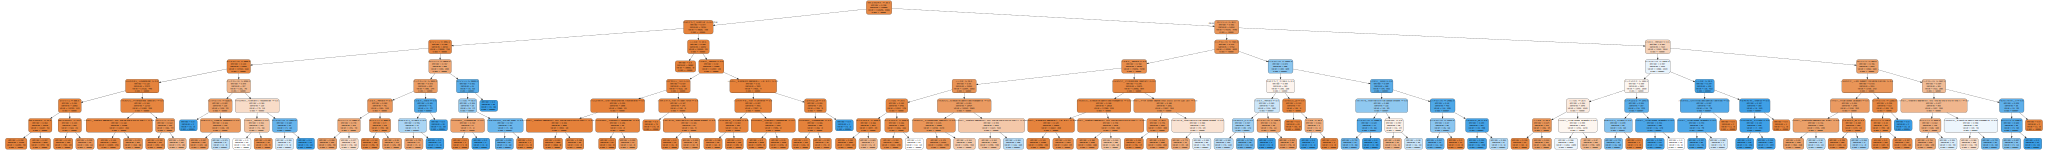

In [46]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7)
clf = clf.fit(X_TRAIN, Y_TRAIN)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=CLEANED_DATA.columns,
                                class_names=CLASS_NAMES,
                                rounded=True, filled=True) 
graph = graphviz.Source(dot_data) 
graph

In [44]:
def test_training_data(clf):
    total = len(RESULTS)
    
    for expected, actual in zip(clf.predict(X_TEST), Y_TEST):
        if expected != actual:
            wrong += 1
    return wrong/total
    

In [45]:
MAX_DEPTH = 3
for i in range(2, 11):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_TRAIN, Y_TRAIN)
    print(f"{i}: {test_training_data(clf)}")

2: 0.02003277817594964
3: 0.018604371425850655
4: 0.01809315216792049
5: 0.01742656235120763
6: 0.01741152649068027
7: 0.017070713652060164
8: 0.016519398766057045
9: 0.016409135788856423
10: 0.01635400430025611
